Let 
$$s_k = \sum_{i=1}^k u_i, \;\;\; u_i \sim \mathbb{U}(0, 1), \; \forall i$$
a sum of $k$ uniform random variables.

Let $X$ be the random variable that represents the number of terms needed to reach a sum greater than $1$:
$$
X = \min\{k \in \mathbb{N} \; | \; s_k > 1\}
$$

Find $\mathbb{E}[X]$.

First, let us simulate this random process.

In [1]:
import random
from collections import Counter

import matplotlib.pyplot as plt


def sim_one() -> int:
    n, s = 0, 0.0
    while s < 1:
        s += random.random()
        n += 1
    return n

In [2]:
N = 10_000_000

simulation_runs = [sim_one() for _ in range(N)]

In [3]:
cntr = Counter(simulation_runs)
print(cntr.most_common())

[(2, 5000700), (3, 3332751), (4, 1249870), (5, 332992), (6, 69758), (7, 11977), (8, 1716), (9, 213), (10, 21), (11, 2)]


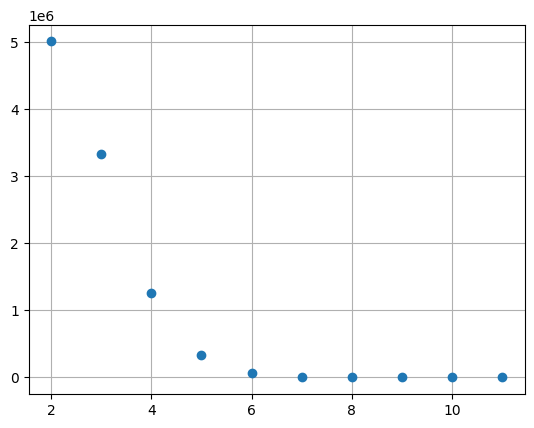

In [4]:
plt.plot(*zip(*cntr.most_common()), "o")
plt.grid()
plt.show()

In [5]:
expected = sum(k * v for k, v in cntr.items()) / N
expected

2.7182357

## Hypothesis
$$
\mathbb{E}[X] = e.
$$

## Proof
Let $p_k$ be the probability that it required $k$ steps to reach a sum greater than $1$:
$$
p_k := \mathbb{P}(X = k) = \mathbb{P}(s_k > 1 \wedge s_{k-1} \leq 1),
$$
and then $\mathbb{E}[X] = \sum_{k=2}^\infty k \, p_k$. 

Note that in our numerical experiment $p_k \approx$ `cntr[k] / N`.

In [6]:
# for example, for p_2
cntr[2] / N

0.50007

Consider $q_k$ — the probability that $s_k$ uniform random variables exceeds $1$:
$$q_k := \mathbb{P}(s_k > 1).$$

And $\bar{q}_k := \mathbb{P}(s_k \leq 1) = 1 - q_k.$


Also note that from the definition of $q_k$ and $\bar{q}_k$ we get
$$
p_k = q_k - q_{k-1},
$$
because $s_k > 1$ (prob. $q_k$) means that either the sum exceeded $1$ at exactly step $k$ (prob. $p_k$) or at some earlier step (prob. $q_{k-1}$) and then $q_k = p_k + q_{k-1}$.



Let us find $\bar{q}_2$. We get for two uniform random variables
$$\bar{q}_2 = \mathbb{P}(s_2 \leq 1),$$
and then, from the geomery of the probability space with $(x_1, x_2) \in A_2 := [0, 1]^2$,
$$
\bar{q}_2 = \frac{\int_{x_2 \leq 1 - x_1} dA_2}{\int_{A_2}dA_2} = \frac{\int_0^1 \int_0^{1-x_1} dx_2 dx_1}{\int_0^1 \int_0^1 dx_2 dx_1} = \frac{1}{|A_2|} \int_0^1 \int_0^{1-x_1} dx_2 dx_1 = \frac{1}{2},
$$
and $q_2 = 1 - 1/2 = 1/2.$

Here and further we use that
$$
|A_k| := \int_{A_k} dA_k = 1, \;\; \forall k \in \mathbb{N}.
$$

Then, 
$$p_2 = q_2 - q_1 = \frac{1}{2} - 0 = \frac{1}{2},$$
which agrees with our numerical result for $k=2$.

Similarly, by repeated integration, we find for $A_3 \subset \mathbb{R}^3$ that
$$
\bar{q}_3 = \mathbb{P}(s_3 \leq 1) = \frac{1}{|A_3|} \int_0^1 \int_0^{1 - x_1} \int_0^{1 - x_1 - x_2} dx_3 dx_2 dx_1 = \frac{1}{6}.
$$

And, in general, for $A_k \subset \mathbb{R}k$,
$$
\bar{q}_k = \mathbb{P}(s_3 \leq 1) = \frac{1}{|A_k|} \int_0^1 \int_0^{1 - x_1} \int_0^{1 - x_1 - x_2} \dots \int_0^{1 - x_1 - x_2 - \dots - x_{k-1}} dx_k \dots dx_3 \, dx_2 \, dx_1.
$$
Note that the upper limits of the first $k-1$ integrals ensure that $x_i > 0$, $\forall i$.

Geometrically, the $k$-integral is equal to the $k$-volume of the space (so-called _simplex_) below the hyperplane $x_1 + \dots + x_k = 1$ in the $k$-dimensional unit cube $A_k$.

The above integral equals $\frac{1}{k!}$ (see [the volume under a standard simplex](https://en.wikipedia.org/wiki/Simplex#Geometric_properties)).

Then,
$$
p_k = q_k - q_{k-1} = (1 - \bar{q}_k) - (1 - \bar{q}_{k-1}) = \bar{q}_{k-1} - \bar{q}_k = \frac{1}{(k-1)!} - \frac{1}{k!} = \frac{k-1}{k!}.
$$

Finally
$$
\mathbb{E}(X) = \sum_{k=2}^\infty k\,p_k = \sum_{k=2}^\infty \frac{k(k-1)}{k!} = \sum_{k=2}^\infty \frac{(k-1)}{(k-1)!} = \sum_{k=2}^\infty \frac{1}{(k-2)!} = \sum_{k=0}^\infty \frac{1}{k!} = e.
$$

Note that the random variable $s_k$ $\sim$ [Irwin-Hall distribution](https://en.wikipedia.org/wiki/Irwin%E2%80%93Hall_distribution)

In [7]:
import math

import numpy as np
from scipy.stats import irwinhall

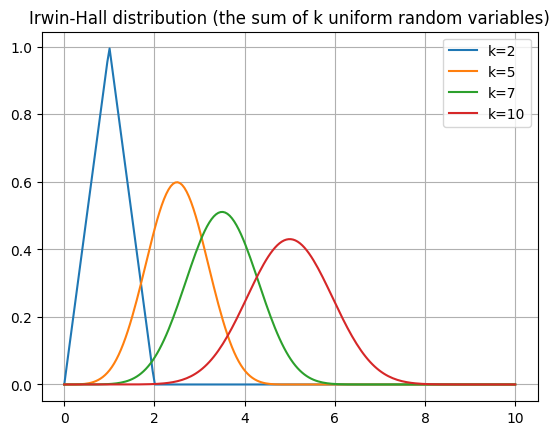

In [8]:
xs = np.linspace(0, 10, 200)
for _k in [2, 5, 7, 10]:
    ys = irwinhall.pdf(xs, _k)
    plt.plot(xs, ys, label=f"k={_k}")
plt.grid()
plt.title("Irwin-Hall distribution (the sum of k uniform random variables)")
plt.legend()
plt.show()

Let us validate numerically that $\bar{q}_k := \mathbb{P}(s_k \leq 1) \equiv \text{cdf}_k(1) = \frac{1}{k!}$ for some values of $k$.

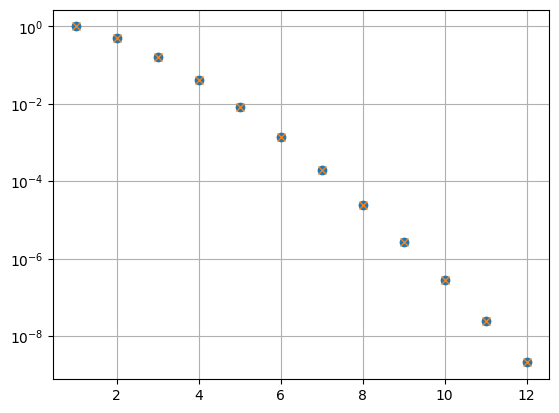

In [9]:
k_vals = list(range(1, 13))
p_vals = [irwinhall.cdf(1, k) for k in k_vals]
factorials = [1 / math.factorial(k) for k in k_vals]


plt.plot(k_vals, p_vals, "o")
plt.plot(k_vals, factorials, "x")
plt.yscale("log")
plt.grid()
